<a href="https://colab.research.google.com/github/atosiroy/CV_Tirana/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 2: IMAGE SEGMENTATION *exercises*


Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

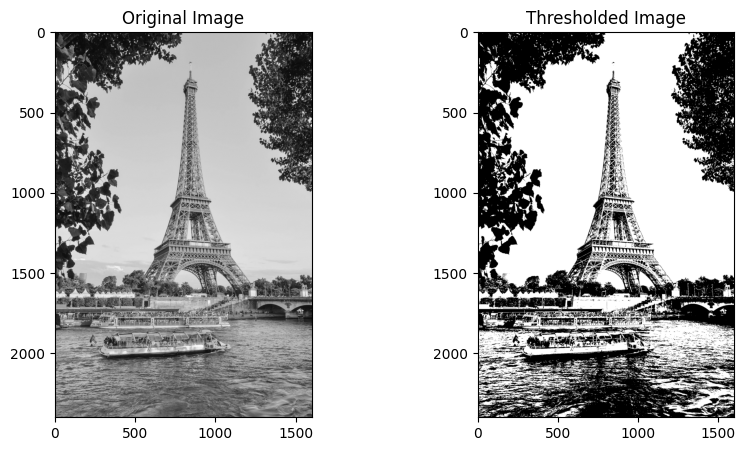

In [ ]:
import skimage as sk
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu

# Load the image
image = sk.io.imread('/content/drive/MyDrive/UPT/CV/paris.jpg', as_gray=True)

# Apply Otsu's thresholding
threshold = threshold_otsu(image)
binary_image = image > threshold

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(binary_image, cmap=plt.cm.gray)
axes[1].set_title('Thresholded Image')
plt.show()



Task 2: Unsupervised Segmentation (K-Means)

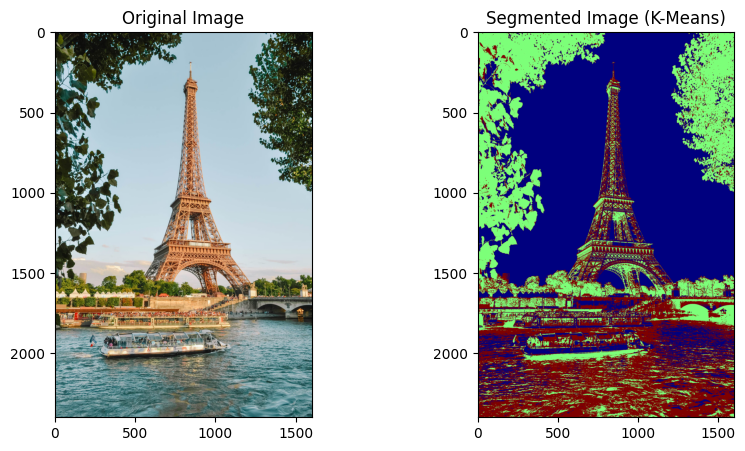

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Load the image
image = sk.io.imread('/content/drive/MyDrive/UPT/CV/paris.jpg')

# Convert the image to a 2D array
image_2D = image.reshape((-1, 3))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2D)
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented Image (K-Means)')
plt.show()


Task 3: Supervised Segmentation (Classifier)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the image and labels
image = sk.io.imread('.jpg')
labels = sk.io.imread('.png', as_gray=True)

# Convert to 2D arrays
image_2D = image.reshape((-1, 3))
labels_1D = labels.reshape(-1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    image_2D, labels_1D, test_size=0.2, random_state=0
)

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=0).fit(X_train, y_train)

# Predict labels for the test image
predicted_labels = classifier.predict(X_test)